<a href="https://colab.research.google.com/github/kenwkliu/ideas/blob/master/colab/MarketBasket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
# Apriori is a algorithm for extracting frequent itemsets with applications in association rule learning (aka Market Basket).

import pandas as pd
from mlxtend.frequent_patterns import apriori

# Enable Google interactive table
from google.colab import data_table
data_table.enable_dataframe_formatter()

*   Raw data contains the users where they have activities in different FB Beauty related fan pages
*  Activities include likes, reactions or comments

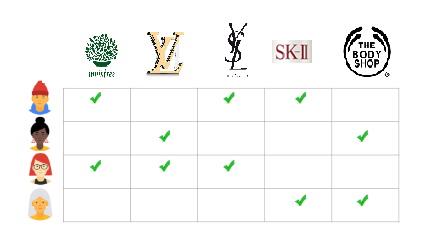

In [ ]:
# Construct the data as market basket format below and replace "NaN" as 0
df = pd.read_csv('https://raw.githubusercontent.com/kenwkliu/ideas/master/colab/data/beautyFanPages.csv').fillna(0)
df

In [ ]:
# show subset of the data
cols = ['LaneigeHongKong', 'HKinnisfree', 'TheBodyShopHongKong', 'Bioderma.HongKong', 'yslbeaute.hk', 'CliniqueHongKong', 'etude.hk', 'shuuemura.hk']
size = len(df)
df[cols][size-100: size-1]

In [ ]:
# min_support is the ratio of itemset that occur together in all the transactions
# lower the min_support number -> easier to be selected
frequent_itemsets = apriori(df, min_support=0.002, use_colnames=True) 

# Add the length of the itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Display only the itemsets that has more than 2 items
result_items = frequent_itemsets[(frequent_itemsets['length'] > 2)]
result_items.sort_values(by=['support'], ascending=False)

#Use interactiave table to filter itemsets = 'HKinnisfree'

In [ ]:
# Check a particular Fan Page for its associated Fan Pages
# Sort by support to see which frequent_itemsets is most strong

PAGE = 'HKinnisfree'
result_items[frequent_itemsets['itemsets'].astype(str).str.contains(PAGE)].sort_values(by=['support'], ascending=False)

In [ ]:
### Investment Fund of Fund exercise
# Find a dataset with all the mutual funds/ETFs
# For each of the fund, list the Top 10 Holdings as the "market basket"
# Run the association rule learning algorithm to get the frequent itemsets as the new Funds
# Or search a stock in the "frequent itemsets" and see which other stocks are usually hold together with

In [ ]:
mutualFund = pd.read_csv('https://raw.githubusercontent.com/kenwkliu/ideas/master/colab/data/mutualFunds.csv', encoding= 'unicode_escape')
mutualFund.head(1000) # look at the first 1000 rows

In [ ]:
# Webscrape the fund Top 10 Holdings from "mutualfunds.com" with the fund_name
# Example: https://mutualfunds.com/funds/AAAAX